In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the data
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')

In [3]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [4]:
#drop columns that I won't be using
drop_cols = ['PD_CD','KY_CD','LAW_CODE','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column']
df2 = df.drop(drop_cols, axis=1)

In [5]:
#making sure I have the columns that I want
df2.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,RAPE,F,Q,105,97,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",ARSON,F,K,69,71,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,SEX CRIMES,F,K,61,0,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",ARSON,F,B,42,71,18-24,M,BLACK
4,234188790,09/28/2021,NaN,NaN,M,B,44,0,25-44,M,BLACK


In [6]:
#turning missing value to "Unknown"
df3 = df2.fillna(value='UNKNOWN')
df3

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,RAPE,F,Q,105,97,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",ARSON,F,K,69,71,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,SEX CRIMES,F,K,61,0,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",ARSON,F,B,42,71,18-24,M,BLACK
4,234188790,09/28/2021,UNKNOWN,UNKNOWN,M,B,44,0,25-44,M,BLACK
...,...,...,...,...,...,...,...,...,...,...,...
155502,222884924,01/10/2021,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,F,B,46,0,45-64,M,BLACK
155503,223918625,02/03/2021,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,F,K,67,0,18-24,M,BLACK
155504,224323770,02/13/2021,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,S,121,0,45-64,M,BLACK
155505,222599533,01/04/2021,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,F,K,73,0,25-44,M,BLACK


In [7]:
#checking the info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ARREST_KEY         155507 non-null  int64 
 1   ARREST_DATE        155507 non-null  object
 2   PD_DESC            155507 non-null  object
 3   OFNS_DESC          155507 non-null  object
 4   LAW_CAT_CD         155507 non-null  object
 5   ARREST_BORO        155507 non-null  object
 6   ARREST_PRECINCT    155507 non-null  int64 
 7   JURISDICTION_CODE  155507 non-null  int64 
 8   AGE_GROUP          155507 non-null  object
 9   PERP_SEX           155507 non-null  object
 10  PERP_RACE          155507 non-null  object
dtypes: int64(3), object(8)
memory usage: 13.1+ MB


In [8]:
#getting a count of how many pd description are there
df3.groupby(['PD_DESC'])['ARREST_KEY'].count()

PD_DESC
A.B.C.,FALSE PROOF OF AGE            2
ACCOSTING,FRAUDULENT                34
ADM.CODE,UNCLASSIFIED MISDEMEA      11
ADM.CODE,UNCLASSIFIED VIOLATIO      14
AGGRAVATED CRIMINAL CONTEMPT       240
                                  ... 
WEAPONS POSSESSION 3               888
WEAPONS, POSSESSION, ETC          1726
WEAPONS,MFR,TRANSPORT,ETC.           6
WEAPONS,PROHIBITED USE IMITATI       1
WOUNDS,REPORTING OF                  1
Name: ARREST_KEY, Length: 242, dtype: int64

In [9]:
#getting a count of how many offense description are there
df3.groupby(['OFNS_DESC'])['ARREST_KEY'].count()

OFNS_DESC
ADMINISTRATIVE CODE                       86
ADMINISTRATIVE CODES                       2
AGRICULTURE & MRKTS LAW-UNCLASSIFIED      72
ALCOHOLIC BEVERAGE CONTROL LAW           313
ANTICIPATORY OFFENSES                     64
                                        ... 
THEFT OF SERVICES                        190
THEFT-FRAUD                              225
UNAUTHORIZED USE OF A VEHICLE            472
UNKNOWN                                  103
VEHICLE AND TRAFFIC LAWS                5264
Name: ARREST_KEY, Length: 64, dtype: int64

In [10]:
#There are only 64 offense description. I want to see all offense description so I'm using the value to create a table and show all 64 row
df3_offense = df3.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending= False)
pd.set_option('display.max_rows', 64)
print(df3_offense)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES            26855
FELONY ASSAULT                          15579
PETIT LARCENY                           13178
DANGEROUS DRUGS                         10450
MISCELLANEOUS PENAL LAW                 10328
CRIMINAL MISCHIEF & RELATED OF           9294
ROBBERY                                  7848
DANGEROUS WEAPONS                        7206
GRAND LARCENY                            6671
VEHICLE AND TRAFFIC LAWS                 5264
BURGLARY                                 4895
OFFENSES AGAINST PUBLIC ADMINI           4682
OFFENSES INVOLVING FRAUD                 3832
SEX CRIMES                               3586
OFF. AGNST PUB ORD SENSBLTY &            3345
FORGERY                                  3127
INTOXICATED & IMPAIRED DRIVING           2334
POSSESSION OF STOLEN PROPERTY            1858
OTHER TRAFFIC INFRACTION                 1632
MURDER & NON-NEGL. MANSLAUGHTE           1513
FOR OTHER AUTHORITIES                    1393
OTHER OFFENSES RELATED T

In [12]:
#looking at the count of other columns by running groupby and print them out so I don't have to do them seperately

print(df3.groupby(['AGE_GROUP'])['ARREST_KEY'].count(),'\n')

print(df3.groupby(['PERP_SEX'])['ARREST_KEY'].count(),'\n')

print(df3.groupby(['PERP_RACE'])['ARREST_KEY'].count(),'\n')

print(df3.groupby(['ARREST_BORO'])['ARREST_KEY'].count(),'\n')

print(df3.groupby(['LAW_CAT_CD'])['ARREST_KEY'].count(),'\n')

print(df3.groupby(['ARREST_PRECINCT'])['ARREST_KEY'].count(),'\n')

AGE_GROUP
18-24    28951
25-44    88850
45-64    30608
65+       2298
<18       4800
Name: ARREST_KEY, dtype: int64 

PERP_SEX
F     26597
M    128910
Name: ARREST_KEY, dtype: int64 

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      443
ASIAN / PACIFIC ISLANDER           8593
BLACK                             77133
BLACK HISPANIC                    13576
UNKNOWN                             587
WHITE                             17063
WHITE HISPANIC                    38112
Name: ARREST_KEY, dtype: int64 

ARREST_BORO
B    34018
K    41550
M    39677
Q    33051
S     7211
Name: ARREST_KEY, dtype: int64 

LAW_CAT_CD
F          70867
I            230
M          82632
UNKNOWN     1393
V            385
Name: ARREST_KEY, dtype: int64 

ARREST_PRECINCT
1      1753
5      2427
6      1430
7      1622
9      1672
       ... 
115    2516
120    2896
121    2175
122    1342
123     798
Name: ARREST_KEY, Length: 77, dtype: int64 



In [13]:
#Checking the date range to see if any other filtering is needed
print('date range:',df3['ARREST_DATE'].min(),'to',df3['ARREST_DATE'].max() )

date range: 01/01/2021 to 12/31/2021


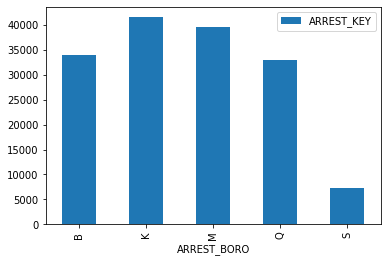

In [14]:
#Bar chart that show crime total count by boroughs
df3.groupby(['ARREST_BORO']).count().plot(kind='bar', y='ARREST_KEY')

Staten Island has the lowest count, but that could also be because much less people live there.

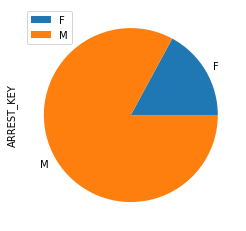

In [15]:
#Pie chart by gender
df3.groupby(['PERP_SEX']).count().plot(kind='pie', y='ARREST_KEY')

It shows men are still more dangerous than woman.

In [16]:
#renaming boroughs
df3['ARREST_BORO'] = df3['ARREST_BORO'].replace(['B','K','M','Q','S'],['Bronx','Brooklyn','Manhattan', 'Queens', 'Staten Island'])
df3.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,RAPE,F,Queens,105,97,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",ARSON,F,Brooklyn,69,71,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,SEX CRIMES,F,Brooklyn,61,0,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",ARSON,F,Bronx,42,71,18-24,M,BLACK
4,234188790,09/28/2021,UNKNOWN,UNKNOWN,M,Bronx,44,0,25-44,M,BLACK


Since I live in Queens, I want to look at the top crimes in Queens

In [17]:
#filtering out Queens
df4 = df3[df3['ARREST_BORO']=='Queens']
df4_queens = df4.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending= False)
df4_queens.head(15)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      6207
FELONY ASSAULT                    3393
MISCELLANEOUS PENAL LAW           3044
PETIT LARCENY                     2342
CRIMINAL MISCHIEF & RELATED OF    2102
DANGEROUS DRUGS                   1474
ROBBERY                           1406
DANGEROUS WEAPONS                 1395
GRAND LARCENY                     1160
VEHICLE AND TRAFFIC LAWS          1115
SEX CRIMES                        1090
FORGERY                            845
BURGLARY                           814
INTOXICATED & IMPAIRED DRIVING     781
OFFENSES AGAINST PUBLIC ADMINI     761
Name: ARREST_KEY, dtype: int64

In [18]:
#filtering out sex crimes and find out the count of them for Queens
sexcrime_list = ['SEX CRIMES', 'RAPE', 'FELONY SEX CRIMES' ]
df4_queens2 = df4[df4['OFNS_DESC'].isin(sexcrime_list)]
df4_queens2.groupby(['OFNS_DESC'])['ARREST_KEY'].count()

OFNS_DESC
RAPE           148
SEX CRIMES    1090
Name: ARREST_KEY, dtype: int64

In [19]:
#filtering out sex crimes and find out the count of them for the whole NYC
sexcrime_list = ['SEX CRIMES', 'RAPE', 'FELONY SEX CRIMES' ]
df3_sc = df3[df3['OFNS_DESC'].isin(sexcrime_list)]
df3_sc.groupby(['OFNS_DESC'])['ARREST_KEY'].count()

OFNS_DESC
FELONY SEX CRIMES       2
RAPE                  606
SEX CRIMES           3586
Name: ARREST_KEY, dtype: int64

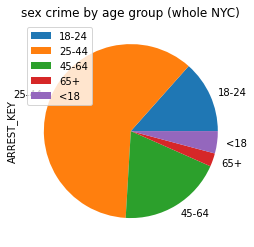

In [20]:
#sex crime by age group
df3_sc.groupby(['AGE_GROUP']).count().plot(kind='pie', y='ARREST_KEY', title='sex crime by age group (whole NYC)')

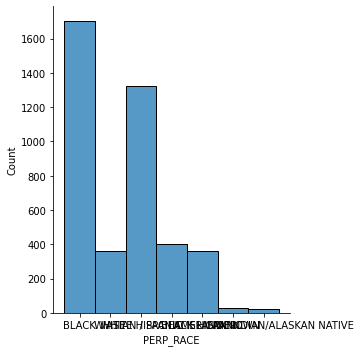

In [21]:
#a displot by race
sns.displot(df3_sc['PERP_RACE'],bins=10)

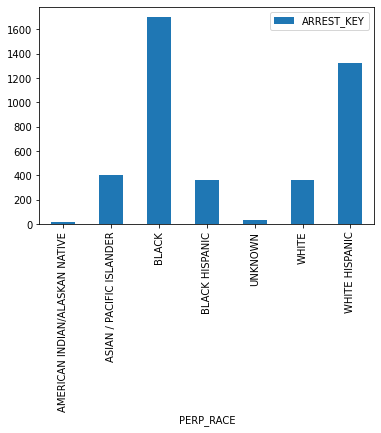

In [22]:
#the above displot is so croweded so I went back to simple bar chart
df3_sc.groupby(['PERP_RACE']).count().plot(kind='bar', y='ARREST_KEY')